EXPLORATORY DATA ANALYSIS

Project Title: Analyzing Swiggy : Bangalore delivery outlet data

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

In [4]:
#importing dataset
swiggy_df=pd.read_excel("D:\mamta\Excel_fles\swiggy_clean_data_new.xlsx")

In [35]:
swiggy_df.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two,Rating_sort,Cost_sort
0,FRESHMENU,AMERICAN,KORAMANGALA,3.9,350,0,2
1,PIPABU,AMERICAN,KORAMANGALA,4.1,257,1,2
2,EASY BITES,AMERICAN,KORAMANGALA,3.9,200,0,1
3,EASY BITES,AMERICAN,HSR,3.8,200,0,1
4,LEON GRILL,AMERICAN,HSR,4.3,300,1,2


THE DATA IS ABOUT
Column1: Names of shops from Banglore city which are swiggy outlets
Column2: Type of Cuisines eg. North Indian or Chinese etc
Column3: Location of that shop in city.
Column4: Ratings of that shop 
column5: Approximate Cost for two persons to serve there by swiggy.

In [6]:
swiggy_df.shape

(331, 5)

In [7]:
swiggy_df.columns

Index(['Shop_Name', 'Cuisine', 'Location', 'Rating', 'Cost_for_Two'], dtype='object')

In [8]:
swiggy_df.describe()

,Rating,Cost_for_Two
count,330.000000,331.000000
mean,4.080606,330.305136
std,0.200727,129.825503
min,3.600000,100.000000
25%,4.000000,250.000000
50%,4.100000,350.000000
75%,4.200000,400.000000
max,4.800000,800.000000


The rows are about cost of two personsin perticular swiggy outlet:
minimum cost=100, maximum cost=800 and avg.cost=330

In [9]:
swiggy_df.info()             #number of categorical and numeric columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Shop_Name     331 non-null    object 
 1   Cuisine       331 non-null    object 
 2   Location      331 non-null    object 
 3   Rating        330 non-null    float64
 4   Cost_for_Two  331 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 13.1+ KB


swiggy data information shows:
totoal 5 columns >> 4 are categorical and 1 coulumn is numeric

In [10]:
swiggy_df.nunique()    #Unique value count per column in whole dataframe.

Shop_Name       115
Cuisine          48
Location          4
Rating           12
Cost_for_Two     30
dtype: int64

In [40]:
cuisine_unique=swiggy_df['Cuisine'].unique()                 #These many different Cuisine types are available in data 

In [41]:
cuisine_unique

array(['AMERICAN', 'ANDHRA', 'ARABIAN', 'ASIAN', 'BAKERY', 'BEVERAGES',
       'BIRYANI', 'CAFE', 'CHAAT', 'CHETTINAD', 'CHINESE', 'COMBO',
       'CONTINENTAL', 'DESSERTS', 'FAST FOOD', 'GRILL', 'HEALTHY FOOD',
       'HOME FOOD', 'HYDERABADI', 'INDIAN', 'ITALIAN', 'JAIN', 'JUICES',
       'KEBABS', 'KERALA', 'LEBANESE', 'MEDITERRANEAN', 'MEXICAN',
       'MIDDLE EASTERN', 'MUGHLAI', 'NORTH INDIAN', 'ORIENTAL',
       'PAN-ASIAN', 'PASTAS', 'PIZZAS', 'PORTUGUESE', 'PUNJABI',
       'RAJASTHANI', 'SALADS', 'SEAFOOD', 'SNACKS', 'SOUTH INDIAN',
       'SWEETS', 'TANDOOR', 'THAI', 'THALIS', 'ICE CREAM', 'TURKISH'],
      dtype=object)

In [12]:
swiggy_df['Location'].unique()     

array(['KORAMANGALA', 'HSR', 'BTM', 'JAYANAGAR'], dtype=object)

In [13]:
# group by Cuisine type  and sort descending

groupby_Cuisine=swiggy_df.groupby('Cuisine')['Shop_Name'].size().sort_values(ascending=False) 

In [14]:
print(groupby_Cuisine.to_markdown())     # Disply in markdown

| Cuisine        |   Shop_Name |
|:---------------|------------:|
| NORTH INDIAN   |          47 |
| CHINESE        |          42 |
| SOUTH INDIAN   |          28 |
| BIRYANI        |          26 |
| DESSERTS       |          22 |
| FAST FOOD      |          20 |
| ANDHRA         |          15 |
| AMERICAN       |          11 |
| SEAFOOD        |           9 |
| BEVERAGES      |           9 |
| MUGHLAI        |           7 |
| INDIAN         |           6 |
| KERALA         |           6 |
| SNACKS         |           5 |
| PIZZAS         |           5 |
| HYDERABADI     |           5 |
| ITALIAN        |           5 |
| HEALTHY FOOD   |           4 |
| ARABIAN        |           4 |
| MEXICAN        |           3 |
| ICE CREAM      |           3 |
| THAI           |           3 |
| ASIAN          |           3 |
| BAKERY         |           3 |
| CONTINENTAL    |           3 |
| PUNJABI        |           2 |
| PORTUGUESE     |           2 |
| SALADS         |           2 |
| PAN-ASIA

Above list shows that the maximum number of outlets are of "NORTH INDIAN" cuisine in this data  with 47 count
later "CHINESE"=42 and "OUTH INDIAN"=28 are leading after it.

In [15]:
  #grouping shops by laction and sorting descending
groupby_shop_Location = swiggy_df.groupby("Location")["Shop_Name"].size().sort_values(ascending=False)   

In [16]:
groupby_shop_Location     

Location
KORAMANGALA    167
BTM            116
HSR             46
JAYANAGAR        2
Name: Shop_Name, dtype: int64

Koramangala  has maximum shops or swiggy outlets : 167  & 
Jayanagar has minimum shops or swiggy outlets  :  2

In [17]:
swiggy_df.isnull().sum()

Shop_Name       0
Cuisine         0
Location        0
Rating          1
Cost_for_Two    0
dtype: int64

In [18]:
swiggy_df[swiggy_df['Rating'].isna()]      #checking NaN value

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
233,MANDYA GOWDRU DONNE BIRYANI,BIRYANI,HSR,NaN,350


Replacing NaN value in Rating column with it mean value.

In [19]:
swiggy_df['Rating'] = swiggy_df['Rating'].fillna(swiggy_df['Rating'].mean())

<AxesSubplot:>

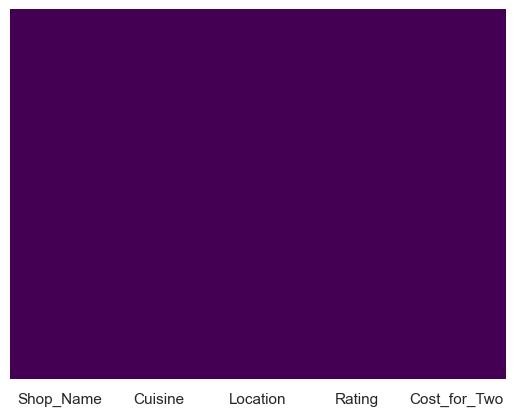

In [20]:
sns.heatmap(swiggy_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
swiggy_df.isnull().sum()

Shop_Name       0
Cuisine         0
Location        0
Rating          0
Cost_for_Two    0
dtype: int64

Now there are no NAN values in the dataset.

Now lets sort our data by ratings, 
say below average=0 and above average=1

In [22]:
swiggy_df['Rating_sort']=0
swiggy_df.loc[swiggy_df['Rating']<=4,'Rating_sort']=0
swiggy_df.loc[swiggy_df['Rating']>4,'Rating_sort']=1

In [23]:
swiggy_df.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two,Rating_sort
0,FRESHMENU,AMERICAN,KORAMANGALA,3.9,350,0
1,PIPABU,AMERICAN,KORAMANGALA,4.1,257,1
2,EASY BITES,AMERICAN,KORAMANGALA,3.9,200,0
3,EASY BITES,AMERICAN,HSR,3.8,200,0
4,LEON GRILL,AMERICAN,HSR,4.3,300,1


In [24]:
swiggy_df.groupby("Rating_sort").size().sort_values(ascending=False)   

Rating_sort
1    197
0    134
dtype: int64

As we divide Ratings in two halves, below and above average, lets divide the "ost for two" in different categories like, affordable=1, reasonable=2, Premium=3

In [25]:
swiggy_df['Cost_sort']=0
swiggy_df.loc[swiggy_df['Cost_for_Two']<=200,'Cost_sort']=1
swiggy_df.loc[(swiggy_df['Cost_for_Two']>200)&(swiggy_df['Cost_for_Two']<=500),'Cost_sort']=2
swiggy_df.loc[swiggy_df['Cost_for_Two']>500,'Cost_sort']=3

In [26]:
swiggy_df.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two,Rating_sort,Cost_sort
0,FRESHMENU,AMERICAN,KORAMANGALA,3.9,350,0,2
1,PIPABU,AMERICAN,KORAMANGALA,4.1,257,1,2
2,EASY BITES,AMERICAN,KORAMANGALA,3.9,200,0,1
3,EASY BITES,AMERICAN,HSR,3.8,200,0,1
4,LEON GRILL,AMERICAN,HSR,4.3,300,1,2


# data visualization
Lets now visualize the data and check the relationship between different attributes which is our main aim for this task.

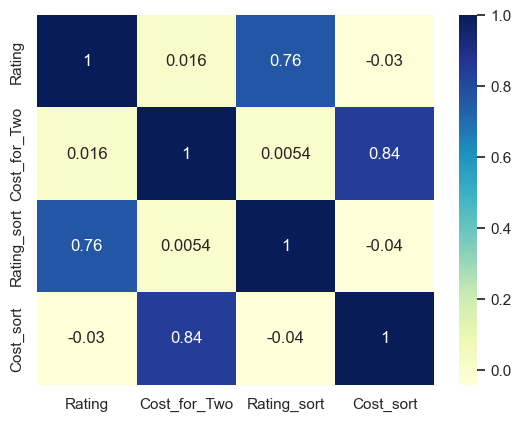

In [27]:
#Using heatmap from seaborn package we can check correlation between different features.
dataplot = sns.heatmap(swiggy_df.corr(), cmap="YlGnBu", annot=True)

# Display the Pharma Sector Heatmap
plt.show()

From above heat map we can easily find the correlation between different attributes.
As 'cost_sort' and 'cost of two' are directly related it is showing positiv corelation between them obviouslu.


<AxesSubplot:xlabel='Rating', ylabel='Count'>

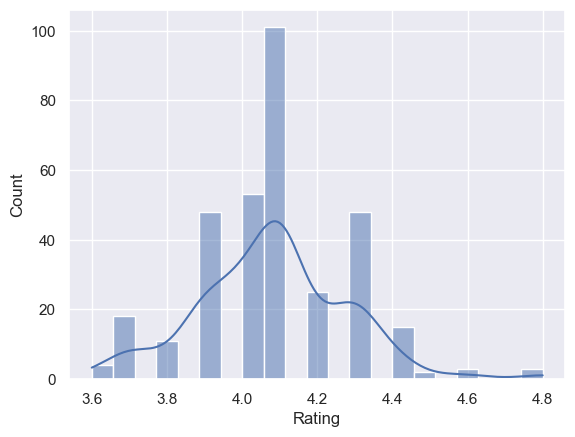

In [28]:
sns.histplot(data = swiggy_df['Rating'], kde = True)

From above visualisation we can say that, Mean Rating is 4.1 approximately and count is 100 is maximum for it.

<AxesSubplot:xlabel='Cost_for_Two', ylabel='Count'>

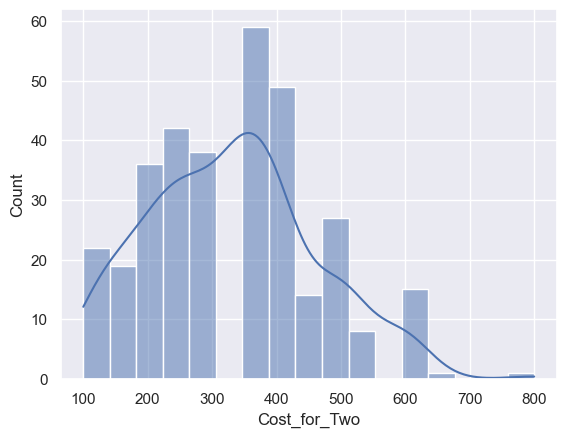

In [29]:
sns.histplot(data = swiggy_df['Cost_for_Two'], kde = True)

Mean cost of two persons is about 350 rs.

<AxesSubplot:xlabel='Location', ylabel='count'>

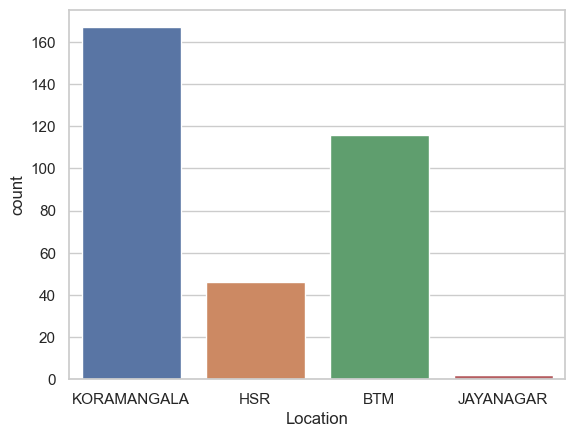

In [30]:
##Viewing survived data using countplot
sns.set_style('whitegrid')
sns.countplot(x='Location',data=swiggy_df)

<AxesSubplot:xlabel='Cost_sort', ylabel='Rating'>

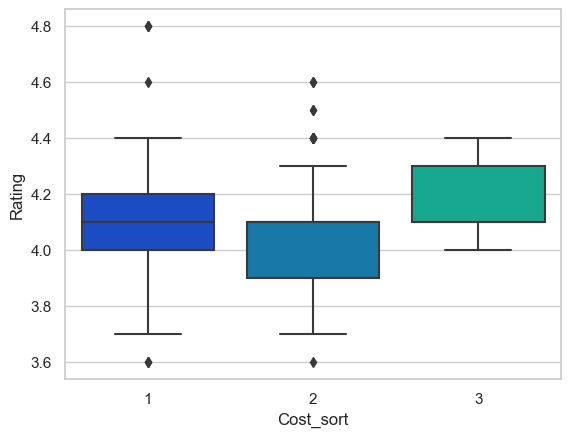

In [31]:
sns.boxplot(x='Cost_sort',y='Rating',data=swiggy_df,palette='winter')

In above box plot shows
For all cost sort type wether it is affordable, reasonable or premium maximul rating lies between 3.9 to 4.4
It show cost and rating are not that much correlated.

<AxesSubplot:xlabel='Rating_sort', ylabel='Cost_for_Two'>

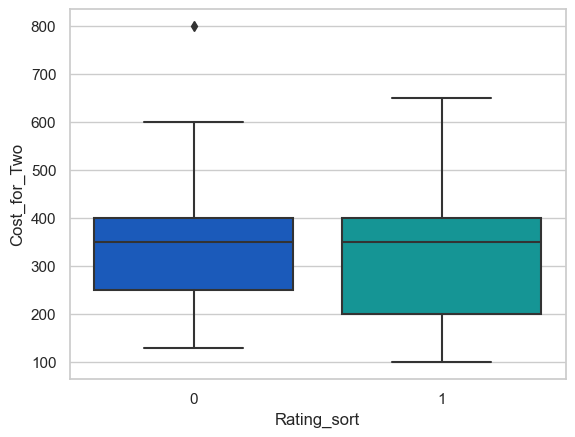

In [32]:
sns.boxplot(x='Rating_sort',y='Cost_for_Two',data=swiggy_df,palette='winter')

Now in above box plot, we plot 0 as below rating and 1 as above raing food category on x axis. And cost of two on y axis, this also shows same thing that mean cost for two persons lies between 200 to 400 irrespective of ratings.
